In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics


# Make numpy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)


In [15]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

dataset = raw_dataset.copy()
dataset = dataset.dropna()
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [16]:
#dataset.head()

In [17]:
#The following script divides data into attributes and labels:
X = dataset.iloc[:, [1,2,3,5,6,7]].values
y = dataset.iloc[:, [0,4]].values

#divide the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Feature Scaling
We know our dataset is not yet a scaled value, for instance the Average_Income field has values in the range of thousands while Petrol_tax has values in range of tens. Therefore, it would be beneficial to scale our data (although, as mentioned earlier, this step isn't as important for the random forests algorithm). To do so, we will use Scikit-Learn's StandardScaler class. Execute the following code to do so:

In [18]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training the Algorithm


In [7]:
regressor = RandomForestRegressor(n_estimators=20000, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

## Evaluating the Algorithm


In [8]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))



Mean Absolute Error: 71.37702149839258
Mean Squared Error: 18873.44110646321
Root Mean Squared Error: 137.38064312872905


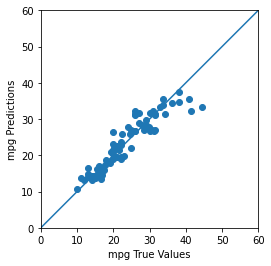

In [12]:



Pred_mpg = y_pred[:,0]
test_mpg = y_test[:,0]
Pred_Weight = y_pred[:,1]
test_Weight = y_test[:,1]

a = plt.axes(aspect='equal')
plt.scatter(test_mpg, Pred_mpg)
plt.xlabel('mpg True Values')
plt.ylabel('mpg Predictions')
lims = [0, 60]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)



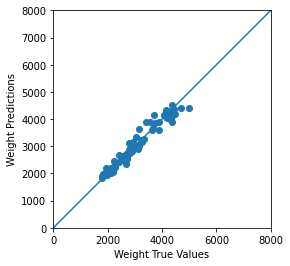

In [13]:
a = plt.axes(aspect='equal')
plt.scatter(test_Weight, Pred_Weight)
plt.xlabel('Weight True Values')
plt.ylabel('Weight Predictions')
lims = [0, 8000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)